# 线性回归：tensorflow 方式

本节，我们介绍如何用 tensorflow 进行线性回归。

我们将针对 iris 数据的 Sepal length (y) 和 Petal width (x) 求解线性方程式系统：$$y = Ax +b$$

在 TensorFlow 中执行线性回归比尝试理解前两节的线性代数或矩阵分解要容易得多。我们会做以下事情：

1. 创建线性回归计算图输出。这意味着我们将接受输入 $x$，并产生输出 $Ax+b$。
2. 我们创建一个损失函数，L2 损失，并使用输出与学习率来计算模型变量的梯度，并最大限度地减少损失。

以这种方式使用 tensorflow 的好处是可以使用任何合理的批量大小的数据对模型进行常规更新和调整，越迭代使我们的机器学习算法越好。

好了，码开：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

创建计算图（会话）

In [2]:
sess = tf.Session()

接下来我们从 Scikit-Learn 库中加载数据。

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

对于大多数TensorFlow算法，我们需要在图中为的占位符和操作声明一个批量大小（batch size）。这里我们设置其为 25。我们可以在 1 和数据集的大小之间随机设置批量大小。

In [4]:
# Declare batch size
batch_size = 25

现在初始化模型中的占位符和变量。

In [5]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

添加模型操作（线性模型输出）和 L2 损失。

In [6]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss function(L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

我们必须告诉 TensorFlow 如何优化和反向传播梯度。我们使用标准梯度下降算子来实现，其学习率为 0.05。

接下来我们初始化模型变量。

In [9]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

迭代训练优化器 100 次。

In [11]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[ 1.75507641]] b = [[ 3.40752625]]
Loss = 0.718171
Step #50 A = [[ 1.44655442]] b = [[ 4.01630831]]
Loss = 0.487307
Step #75 A = [[ 1.1736486]] b = [[ 4.32669306]]
Loss = 0.249546
Step #100 A = [[ 1.0773859]] b = [[ 4.50590658]]
Loss = 0.164787


我们取出最优系数并得到最佳拟合线。

In [12]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

使用 matplotlib 绘制结果，除了拟合线我们还绘制模型训练迭代中的 L2 损失值。

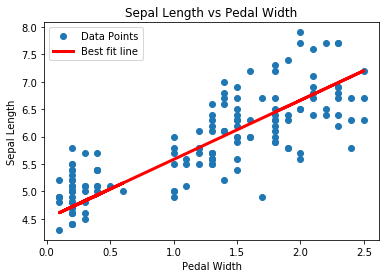

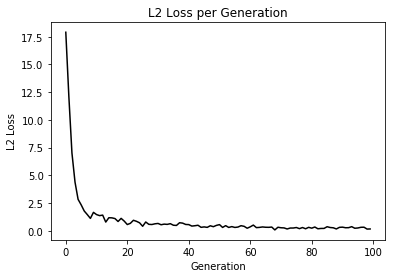

In [13]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()